In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import os.path
import math
import random

In [2]:
import sys
sys.path.append('C:\\Users\\joo09\\Documents\\GitHub\\LIBRARY')
import model_lib as lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import shutil

In [3]:
# 가져올 업태
maindir = 'D:\\project\\교육서비스업'
splitdir = maindir + '\\1_주말_주중_나누기'
sortdir = maindir + '\\2_결측값_기준_이하_제거'
outlierdir = maindir + '\\3_이상치제거'
dirbtween = maindir + '\\4_선형보간'
donedir = maindir + '\\5_전처리완료'
finaldir = maindir + '\\6_최종'

model2dir = maindir + '\\model2'
model3dir = maindir + '\\model3'
model3cluster = maindir + '\\model3_clustering'
model4dir = maindir + '\\model4'
plotdir = maindir + '\\결과플로팅'

genedir = 'D:\\project\\샘플 - 복사본 (2)'

### 군집 별로 몇 개의 샘플 뽑을지 설정

In [40]:


want = pd.DataFrame(columns = ['num_crowd'])
for i in range(0, 20) :
    want.loc[i, :] = np.nan
    
want.loc[ : 9, 'num_crowd'] = 0
want.loc[10 : 19, 'num_crowd'] = 1
print(want)

os.chdir(genedir)
want.to_excel('원하는 세대 특징(이파일만변경).xlsx')

   num_crowd
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1


# model2 에서 std 범위 가져오기

52


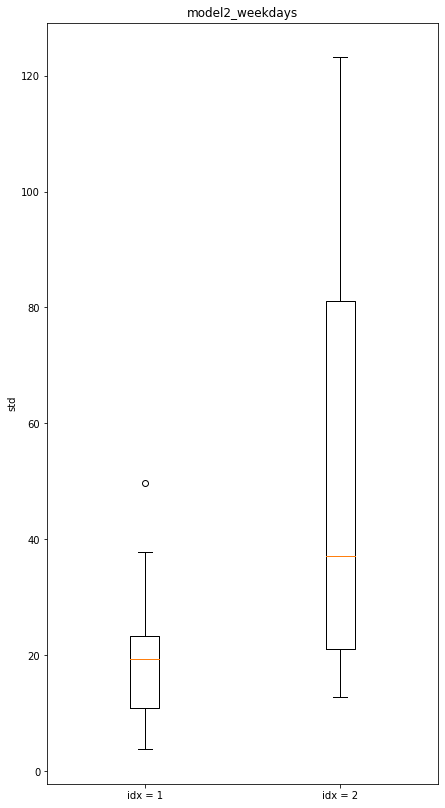

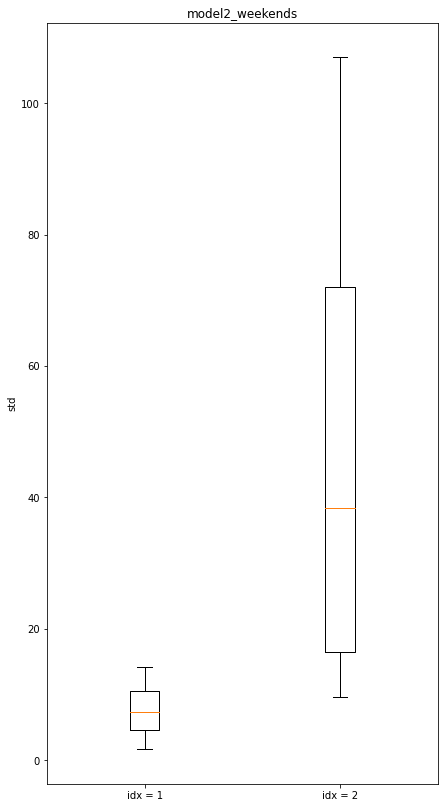

In [6]:
os.chdir('D:\\project\\교육서비스업\\model2')
std_idx_days = lib.read_excel('model2_weekdays_std_idx.xlsx')
std_idx_ends = lib.read_excel('model2_weekends_std_idx.xlsx')

print(std_idx_days.shape[0])
title = 'model2_weekdays'
plt.rcParams["figure.figsize"] = (7,14)

for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    temp_days = std_idx_days[std_idx_days['num_cluster'] == i].loc[:, 'std']
    temp_days.reset_index(drop = True, inplace = True)
    
    name = 'bp_{}'.format(i)
    locals()[name] = plt.boxplot(temp_days, positions = [i + 1])
    
xticks_list = []
xticks_name = []
for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    xticks_list.append(i + 1)
    xticks_name.append('idx = {}'.format(i + 1))

plt.xticks(xticks_list, xticks_name)
plt.ylabel('std')
plt.title("{}".format(title))
os.chdir(genedir)
plt.savefig('weekdays_boxplot.png', dpi=400)
plt.show()


title = 'model2_weekends'
plt.rcParams["figure.figsize"] = (7,14)

for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    temp_ends = std_idx_ends[std_idx_ends['num_cluster'] == i].loc[:, 'std']
    temp_ends.reset_index(drop = True, inplace = True)
    
    name = 'bp_{}'.format(i)
    locals()[name] = plt.boxplot(temp_ends, positions = [i + 1])
    
xticks_list = []
xticks_name = []
for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    xticks_list.append(i + 1)
    xticks_name.append('idx = {}'.format(i + 1))

plt.xticks(xticks_list, xticks_name)
plt.ylabel('std')
plt.title("{}".format(title))
os.chdir(genedir)
plt.savefig('weekends_boxplot.png', dpi=400)
plt.show()

In [7]:
os.chdir(model2dir)
std_days = lib.read_excel('model2_weekdays_std_idx.xlsx')
std_ends = lib.read_excel('model2_weekends_std_idx.xlsx')

std_days_0 = std_days[std_days['num_cluster'] == 0]
std_days_1 = std_days[std_days['num_cluster'] == 1]

std_ends_0 = std_ends[std_ends['num_cluster'] == 0]
std_ends_1 = std_ends[std_ends['num_cluster'] == 1]


min_days_0 = min(std_days_0.loc[:, 'std'])
max_days_0 = max(std_days_0.loc[:, 'std'])
min_ends_0 = min(std_ends_0.loc[:, 'std'])
max_ends_0 = max(std_ends_0.loc[:, 'std'])

min_days_1 = min(std_days_1.loc[:, 'std'])
max_days_1 = max(std_days_1.loc[:, 'std'])
min_ends_1 = min(std_ends_1.loc[:, 'std'])
max_ends_1 = max(std_ends_1.loc[:, 'std'])

print(min_days_0, max_days_0, min_ends_0, max_ends_0)
print(min_days_1, max_days_1, min_ends_1, max_ends_1)
    

3.774263833224561 49.6551075339141 1.677827919833238 14.118215805287
12.84065814235363 123.1599995557608 9.67736934696279 106.973187892706


# model3 주말, 주중별 24시간 평균 프로필 만들기

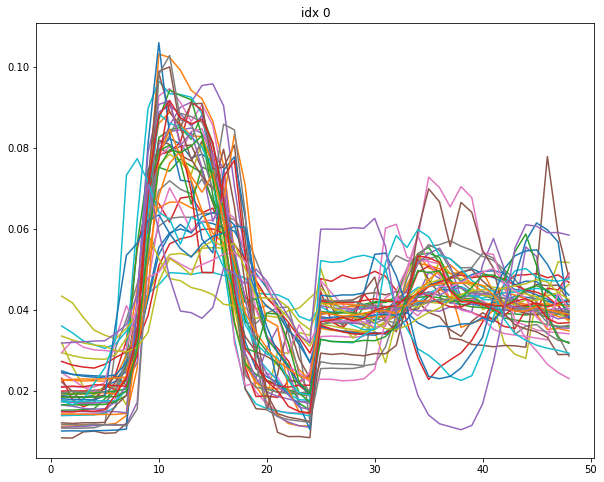

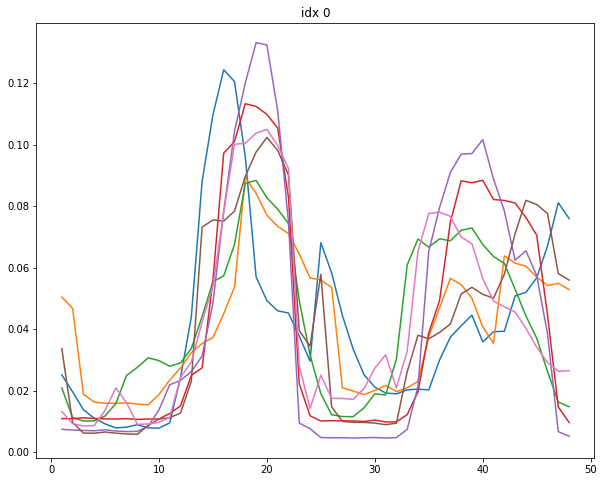

In [38]:
os.chdir(model3cluster)
idx0_48 = lib.read_excel('cluster_0_ave_profile.xlsx')
idx1_48 = lib.read_excel('cluster_1_ave_profile.xlsx')
idx0_48.columns = idx0_48.columns.astype(str)
idx1_48.columns = idx1_48.columns.astype(str)

# os.chdir(genedir)
# idx0_48 = lib.read_excel('model3_idx0.xlsx')
# idx1_48 = lib.read_excel('model3_idx1.xlsx')
# idx0_48.columns = idx0_48.columns.astype(str)
# idx1_48.columns = idx1_48.columns.astype(str)

hours = []
for i in range(1, 25) :
    hours.append(i)
    
hours_ex = []
for i in range(1, 49) :
    hours_ex.append(i)

idx0_48_days = pd.DataFrame(columns = ['excel'] + hours)
idx0_48_ends = pd.DataFrame(columns = ['excel'] + hours)
idx1_48_days = pd.DataFrame(columns = ['excel'] + hours)
idx1_48_ends = pd.DataFrame(columns = ['excel'] + hours)

idx0_48_days.columns = idx0_48_days.columns.astype(str)
idx0_48_ends.columns = idx0_48_ends.columns.astype(str)
idx1_48_days.columns = idx1_48_days.columns.astype(str)
idx1_48_ends.columns = idx1_48_ends.columns.astype(str)

##
idx0_48_days.loc[:, 'excel'] = idx0_48.loc[:, 'excel']
idx0_48_days.loc[:, '1' : '24'] = idx0_48.loc[:, '1' : '24']

idx0_48_ends.loc[:, 'excel'] = idx0_48.loc[:, 'excel']

for i in range(1, 25) :
    idx0_48_ends.loc[:, '{}'.format(i)] = idx0_48.loc[:, '{}'.format(i + 24)]
    
##
idx1_48_days.loc[:, 'excel'] = idx1_48.loc[:, 'excel']
idx1_48_days.loc[:, '1' : '24'] = idx1_48.loc[:, '1' : '24']

idx1_48_ends.loc[:, 'excel'] = idx1_48.loc[:, 'excel']

for i in range(1, 25) :
    idx1_48_ends.loc[:, '{}'.format(i)] = idx1_48.loc[:, '{}'.format(i + 24)]
    

temp_day = idx0_48_days
temp_end = idx0_48_ends
plt.rcParams["figure.figsize"] = (10,8)
plt.title('{}'.format('idx 0'))

for i in range(temp_day.shape[0]) :
    plt.plot(hours_ex, temp_day.loc[i, '1' : '24'].tolist() + temp_end.loc[i, '1' : '24'].tolist())
    
plt.show()
    
temp_day = idx1_48_days
temp_end = idx1_48_ends
plt.rcParams["figure.figsize"] = (10,8)
plt.title('{}'.format('idx 0'))

for i in range(temp_day.shape[0]) :
    plt.plot(hours_ex, temp_day.loc[i, '1' : '24'].tolist() + temp_end.loc[i, '1' : '24'].tolist())
    
plt.show()
        
    
    
    
os.chdir(genedir)
idx0_48_days.to_excel('idx0_48_days.xlsx')
idx0_48_ends.to_excel('idx0_48_ends.xlsx')
idx1_48_days.to_excel('idx1_48_days.xlsx')
idx1_48_ends.to_excel('idx1_48_ends.xlsx')

# sample 만들기

In [22]:
print(os.listdir(genedir))

os.chdir(model4dir)
for folder in os.listdir(model4dir) :
    tempdir = model4dir + '\\' + folder
    if os.path.isdir(tempdir) :
        if '주중' in folder : 
            os.chdir(tempdir)
            temp_0 = lib.read_excel('idx0.xlsx')
            temp_1 = lib.read_excel('idx1.xlsx')
            
            os.chdir(genedir)
            temp_0.to_excel('model4_weekdays_0.xlsx')
            temp_1.to_excel('model4_weekdays_1.xlsx')
            
        elif '주말' in folder : 
            os.chdir(tempdir)
            temp_0 = lib.read_excel('idx0.xlsx')
            temp_1 = lib.read_excel('idx1.xlsx')
            
            os.chdir(genedir)
            temp_0.to_excel('model4_weekends_0.xlsx')
            temp_1.to_excel('model4_weekends_1.xlsx')
            
print('done')
print(os.listdir(genedir))

['idx0_48_days.xlsx', 'idx0_48_ends.xlsx', 'idx1_48_days.xlsx', 'idx1_48_ends.xlsx', 'model2_std', 'model3_profile', 'model4', 'model4_weekdays_0.xlsx', 'model4_weekdays_1.xlsx', 'model4_weekends_0.xlsx', 'model4_weekends_1.xlsx', 'samples', 'weekdays_boxplot.png', 'weekends_boxplot.png', '샘플 모델 확인.py', '원하는 세대 특징(이파일만변경).xlsx', '전력생성기.py']
done
['idx0_48_days.xlsx', 'idx0_48_ends.xlsx', 'idx1_48_days.xlsx', 'idx1_48_ends.xlsx', 'model2_std', 'model3_profile', 'model4', 'model4_weekdays_0.xlsx', 'model4_weekdays_1.xlsx', 'model4_weekends_0.xlsx', 'model4_weekends_1.xlsx', 'samples', 'weekdays_boxplot.png', 'weekends_boxplot.png', '샘플 모델 확인.py', '원하는 세대 특징(이파일만변경).xlsx', '전력생성기.py']


In [84]:
os.chdir(genedir)
# 원하는 세대 수와 세대 특징 입력된 파일 읽기
want = pd.read_excel('원하는 세대 특징(이파일만변경).xlsx')

def read_excel(string) :
    df = pd.read_excel(string)
    df = df.drop('Unnamed: 0', axis = 1)
    
    return df
crowdlist = []
for i in range(len(want)):
    X = None
    Y = None
    os.chdir(genedir)
    crowd  = want.loc[i, 'num_crowd']
    print('{}th sample, crowd num = {}'.format(i, crowd))
    
    if crowd not in crowdlist :
        crowdlist.append('crowd_{}'.format(crowd))
    
#############################################################  
    # model 1
    
    week_1year = 100
    weekend_1year = 100

    ave_week_1day = 100
    ave_weekend_1day = 100

#############################################################  

    # 군집별 표준편차 구하기(model2)
    if crowd == 0:
        st_week = random.uniform(min_days_0, max_days_0)
        st_weekend = random.uniform(min_ends_0, max_ends_0)
        
    elif crowd == 1:
        st_week = random.uniform(min_days_1, max_days_1)
        st_weekend = random.uniform(min_ends_1,max_ends_1)
    else:
        print('요청한 군집 번호 {}는 사용할 수 없습니다. 군집 번호 1, 2만 사용가능합니다.'.format(crowd))
        break
    
#############################################################  
    
    # 다변량 이용하여 고정(평균) 프로필 1개 만들기(평일) (model 3)
    ## 군집 0, 주중
    
    os.chdir(genedir)
    sample_day = read_excel('idx{}_48_days.xlsx'.format(crowd))
    print('model3 weekdays, excel = idx{}_48_days.xlsx'.format(crowd))
    sample_day = sample_day.loc[:, '1' :].astype(float)

    var_1 = sample_day.cov() # 공분산
    mean_1 = sample_day.mean() # 평균

    fixed_profile_week = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1) # 다변량 코드, 반복해서 0보다 큰 X값 만들기
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_week['fixed'] = X # 고정 프로필

    
    
    
    ## 군집 0, 주말
    os.chdir(genedir)
    sample_end = read_excel('idx{}_48_ends.xlsx'.format(crowd))
    print('model3 weekdays, excel = idx{}_48_ends.xlsx'.format(crowd))
    sample_end = sample_end.loc[:, '1' :].astype(float)
    var_1 = sample_end.cov()
    mean_1 = sample_end.mean()

    fixed_profile_weekend = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1)
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_weekend['fixed'] = X     

    
    
    # 일마다 변하는 프로필 만들기(평일) (model 4)
    os.chdir(genedir)
    test = read_excel('model4_weekdays_{}.xlsx'.format(crowd))
    print('model4 weekdays, excel = model4_weekdays_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov() 
    mean_1 = test.mean()
    changed_profile_week = pd.DataFrame()

    # 평균과 표준편차를 이용하여 1일 사용량 도출
    for t in range(261):
        #weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
        while 1:
            week_1day = np.random.normal(ave_week_1day, st_week) # st_week 는 model2에서 뽑은 std
            if week_1day > 0:
                break

        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_week.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_week.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y) # 합 1 되도록 normalize
        Y = Y * week_1day
        changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성

        ##
        # 일마다 변하는 프로필 만들기(주말)
    os.chdir(genedir)
    test = read_excel('model4_weekends_{}.xlsx'.format(crowd))
    print('model4 weekdays, excel = model4_weekends_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov()
    mean_1 = test.mean()
    changed_profile_weekend = pd.DataFrame()

    for t in range(104):
        # 평균과 표준편차를 이용하여 1일 사용량 도출
        #week_1day = np.random.normal(ave_week_1day, st_week)
        while 1:
            weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
            if weekend_1day > 0:
                break
        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_weekend.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_weekend.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y)
        Y = Y * weekend_1day
        changed_profile_weekend['{}일'.format(t+1)] = Y.copy()
    

    hours = []
    for j in range(1, 25) :
        hours.append(j)
        
    changed_profile_week = pd.DataFrame(changed_profile_week)
    changed_profile_week = changed_profile_week.transpose()
    changed_profile_week.reset_index(drop = True, inplace = True)
    changed_profile_week.columns = hours
    
    changed_profile_weekend = pd.DataFrame(changed_profile_weekend)
    changed_profile_weekend = changed_profile_weekend.transpose()
    changed_profile_weekend.reset_index(drop = True, inplace = True)    
    changed_profile_weekend.columns = hours

#############################################################

    crowdlist.append('mix')
    folderlist = ['주중', '주말']
    newfolderlist(genedir + '\\samples', crowdlist)
    for folder in os.listdir(genedir + '\\samples') :
        tempdir = genedir + '\\samples\\' + folder
        newfolderlist(tempdir, folderlist)
         
    
    # 샘플을 폴더에 저장하는 부분입니다.
    print('{}번째전력프로필 완성'.format(i+1))
    # 완성된 파일 저장
    os.chdir(genedir +'\\samples\\crowd_{}\\주중'.format(crowd))
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주중')
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    
    os.chdir(genedir +'\\samples\\crowd_{}\\주말'.format(crowd))
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주말')
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))
    
    print('saved in \\crowd_{}\\주중, excel name = sample_{}_주중.xlsx'.format(crowd, i+1))
    print('saved in \\mix\\주중, excel name = sample_{}_주중.xlsx'.format(i+1))
    
    print('saved in \\crowd_{}\\주말, excel name = sample_{}_주말.xlsx'.format(crowd, i+1))
    print('saved in \\mix\\주말, excel name = sample_{}_주중.xlsx'.format(i+1))
    
    os.chdir(genedir + '\\samples\\mix')
    fixed_profile_week.to_excel('fixed_{}_weekdays.xlsx'.format(i + 1))
    fixed_profile_weekend.to_excel('fixed_{}_weekends.xlsx'.format(i + 1))
    print('################ new sample ################')

0th sample, crowd num = 0
model3 weekdays, excel = idx0_48_days.xlsx
model3 weekdays, excel = idx0_48_ends.xlsx
model4 weekdays, excel = model4_weekdays_0.xlsx


C:\Users\joo09\AppData\Local\Temp/ipykernel_10216/163862783.py:136: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성


model4 weekdays, excel = model4_weekends_0.xlsx
1번째전력프로필 완성


C:\Users\joo09\AppData\Local\Temp/ipykernel_10216/163862783.py:174: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  changed_profile_weekend['{}일'.format(t+1)] = Y.copy()


saved in \crowd_0\주중, excel name = sample_1_주중.xlsx
saved in \mix\주중, excel name = sample_1_주중.xlsx
saved in \crowd_0\주말, excel name = sample_1_주말.xlsx
saved in \mix\주말, excel name = sample_1_주중.xlsx
################ new sample ################
1th sample, crowd num = 0
model3 weekdays, excel = idx0_48_days.xlsx
model3 weekdays, excel = idx0_48_ends.xlsx
model4 weekdays, excel = model4_weekdays_0.xlsx
model4 weekdays, excel = model4_weekends_0.xlsx
2번째전력프로필 완성
saved in \crowd_0\주중, excel name = sample_2_주중.xlsx
saved in \mix\주중, excel name = sample_2_주중.xlsx
saved in \crowd_0\주말, excel name = sample_2_주말.xlsx
saved in \mix\주말, excel name = sample_2_주중.xlsx
################ new sample ################
2th sample, crowd num = 0
model3 weekdays, excel = idx0_48_days.xlsx
model3 weekdays, excel = idx0_48_ends.xlsx
model4 weekdays, excel = model4_weekdays_0.xlsx
model4 weekdays, excel = model4_weekends_0.xlsx
3번째전력프로필 완성
saved in \crowd_0\주중, excel name = sample_3_주중.xlsx
saved in \mix\주중, 

model4 weekdays, excel = model4_weekdays_1.xlsx
model4 weekdays, excel = model4_weekends_1.xlsx
19번째전력프로필 완성
saved in \crowd_1\주중, excel name = sample_19_주중.xlsx
saved in \mix\주중, excel name = sample_19_주중.xlsx
saved in \crowd_1\주말, excel name = sample_19_주말.xlsx
saved in \mix\주말, excel name = sample_19_주중.xlsx
################ new sample ################
19th sample, crowd num = 1
model3 weekdays, excel = idx1_48_days.xlsx
model3 weekdays, excel = idx1_48_ends.xlsx
model4 weekdays, excel = model4_weekdays_1.xlsx
model4 weekdays, excel = model4_weekends_1.xlsx
20번째전력프로필 완성
saved in \crowd_1\주중, excel name = sample_20_주중.xlsx
saved in \mix\주중, excel name = sample_20_주중.xlsx
saved in \crowd_1\주말, excel name = sample_20_주말.xlsx
saved in \mix\주말, excel name = sample_20_주중.xlsx
################ new sample ################


    num_crowd
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1


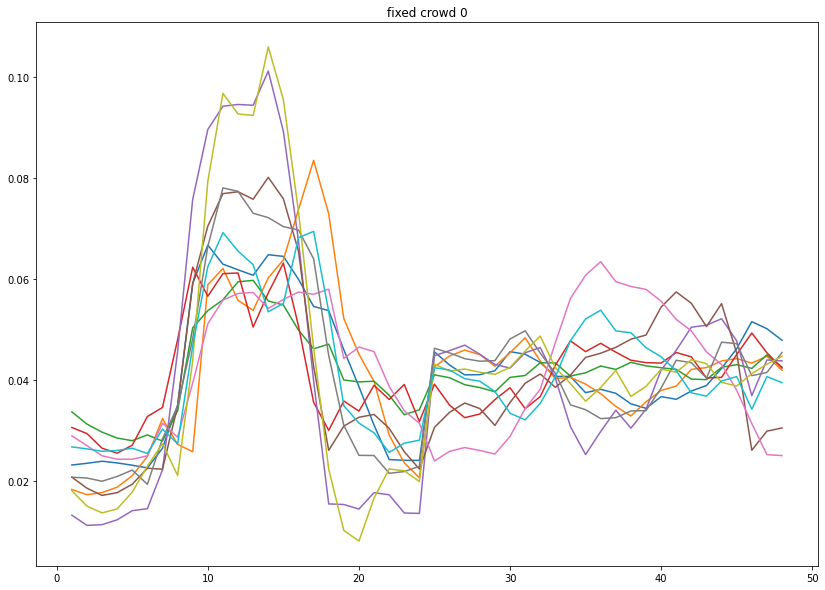

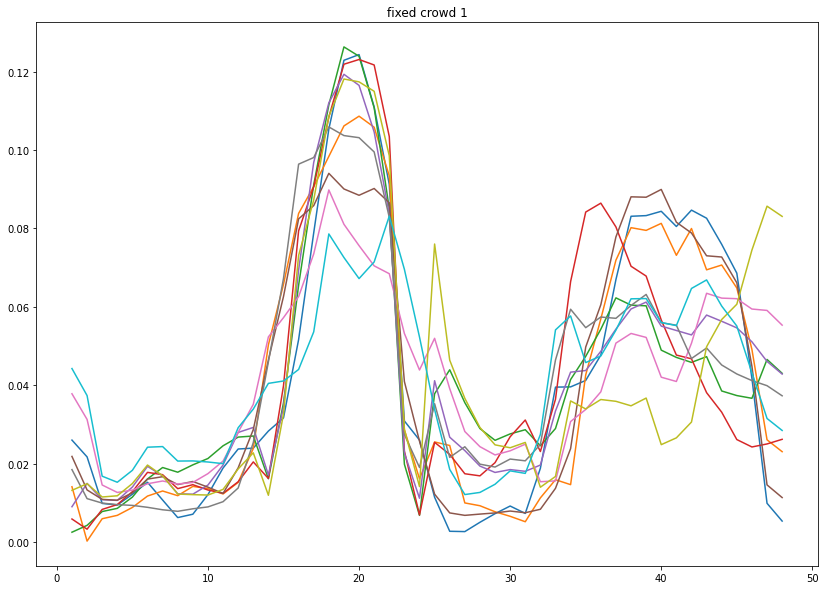

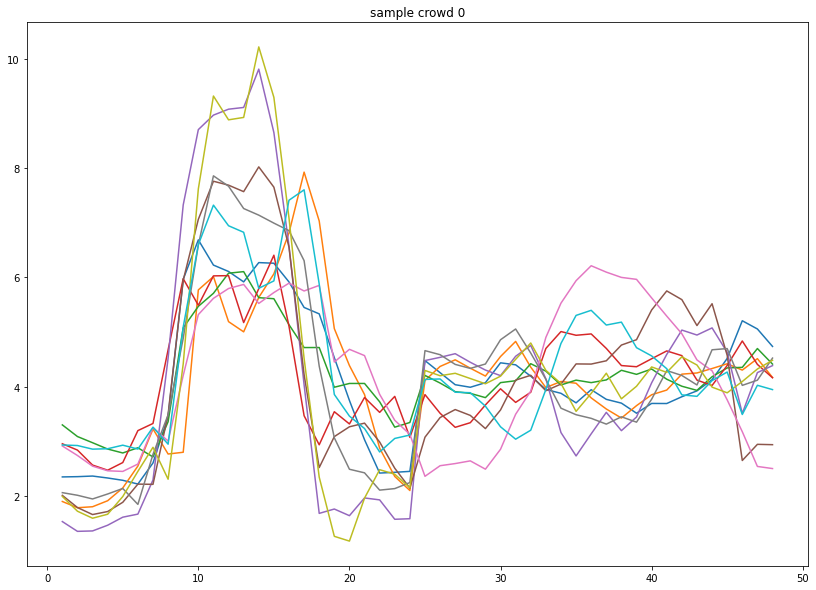

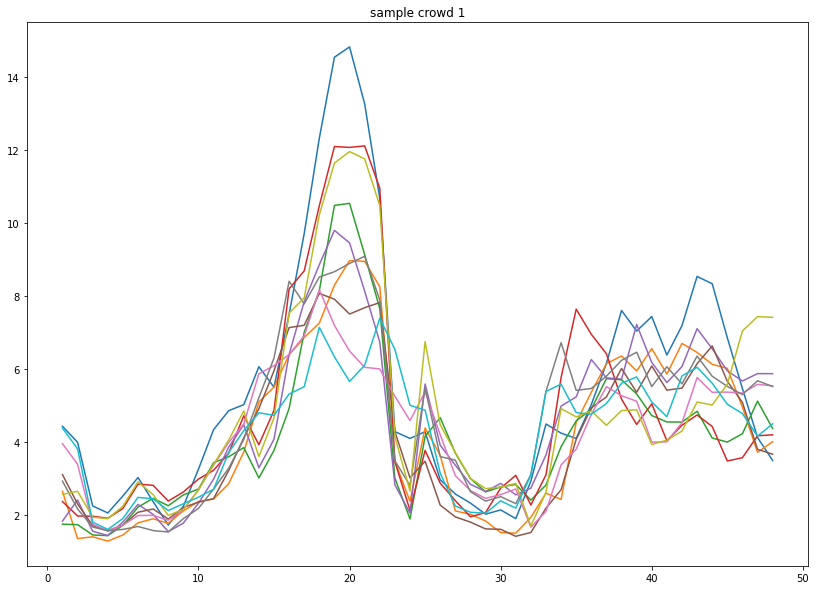

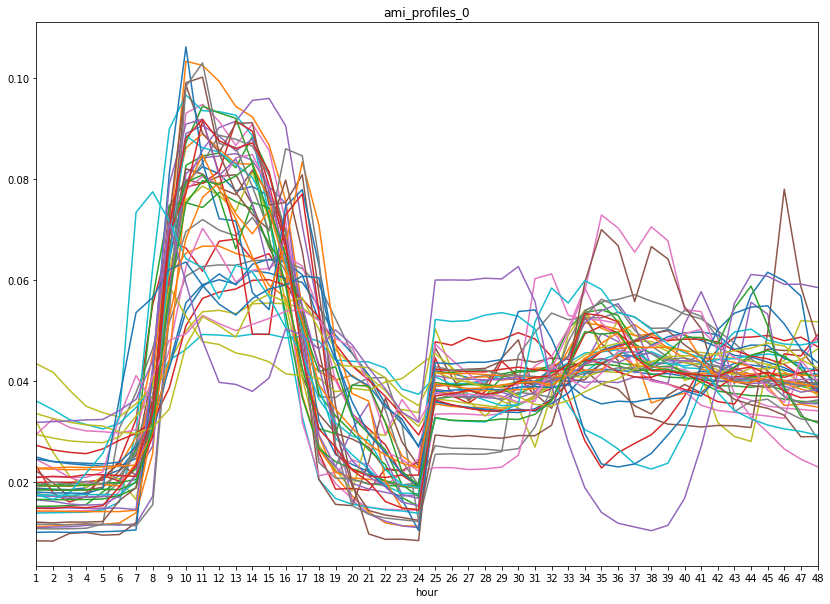

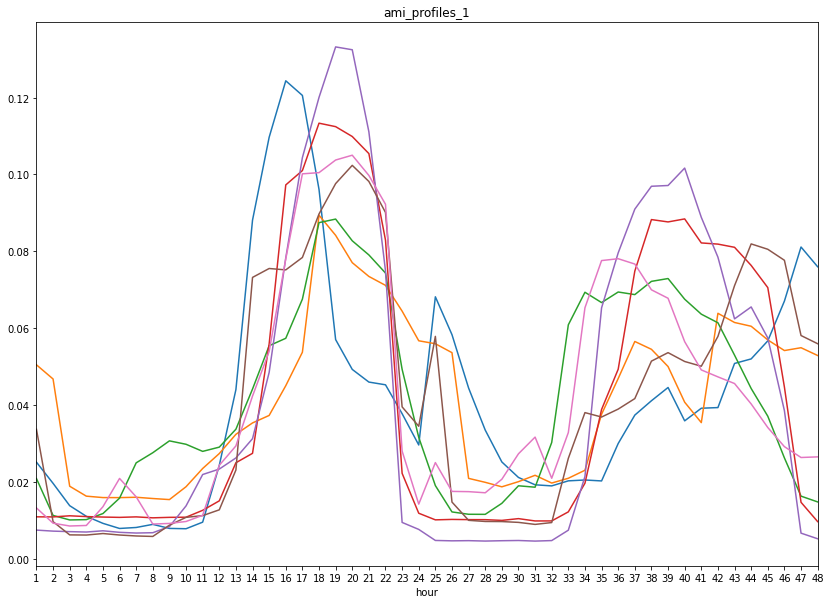

In [85]:
os.chdir(genedir)
# 원하는 세대 수와 세대 특징 입력된 파일 읽기
want = lib.read_excel('원하는 세대 특징(이파일만변경).xlsx')
print(want)
for i in range(len(want)):
    crowd  = want.loc[i, 'num_crowd']
#     print('{}th sample, crowd num = {}'.format(i, crowd))

hours = []
for i in range(1, 25) :
    hours.append(i)
    
hours_ex = []
for i in range(1, 49) :
    hours_ex.append(i)
    

mixsample = genedir + '\\samples\\mix'
os.chdir(mixsample)

excel_list = []
for excel in os.listdir(mixsample) :
    if '.xlsx' in excel :
        excel_list.append(excel)
        
# print(excel_list)
        
for i in range(1, 21) :
    plt.title('fixed crowd 0')
    if want.loc[i - 1, 'num_crowd'] == 0 :
        temp_day = lib.read_excel('fixed_{}_weekdays.xlsx'.format(i))
        temp_end = lib.read_excel('fixed_{}_weekends.xlsx'.format(i))
        
        plt.plot(hours_ex, temp_day.loc[:, 'fixed'].tolist() + temp_end.loc[:, 'fixed'].tolist())
plt.show()

for i in range(1, 21) :
    plt.title('fixed crowd 1')
    if want.loc[i - 1, 'num_crowd'] == 1 :
        temp_day = lib.read_excel('fixed_{}_weekdays.xlsx'.format(i))
        temp_end = lib.read_excel('fixed_{}_weekends.xlsx'.format(i))
        
        plt.plot(hours_ex, temp_day.loc[:, 'fixed'].tolist() + temp_end.loc[:, 'fixed'].tolist())
plt.show()    


###########################################

dir0 = genedir + '\\samples\\crowd_0'
dir1 = genedir + '\\samples\\crowd_1'

plt.title('sample crowd 0')
for i in range(1, 11) :
    os.chdir(dir0 + '\\주중')
    temp_day = lib.read_excel('sample_{}_주중.xlsx'.format(i))
    os.chdir(dir0 + '\\주말')
    temp_end = lib.read_excel('sample_{}_주말.xlsx'.format(i))
        
    temp_day.columns = temp_day.columns.astype(str)
    temp_end.columns = temp_end.columns.astype(str)

    list = []
    for j in range(1, 25) :
        list.append(lib.ave(temp_day.loc[:, str(j)].tolist()))

    ave_end = []
    for j in range(1, 25) :
        list.append(lib.ave(temp_end.loc[:, str(j)].tolist()))

    plt.plot(hours_ex, list)

plt.show()    
    
plt.title('sample crowd 1')
for i in range(11, 21) :
    os.chdir(dir1 + '\\주중')
    temp_day = lib.read_excel('sample_{}_주중.xlsx'.format(i))
    os.chdir(dir1 + '\\주말')
    temp_end = lib.read_excel('sample_{}_주말.xlsx'.format(i))
    
    
    temp_day.columns = temp_day.columns.astype(str)
    temp_end.columns = temp_end.columns.astype(str)

    list = []
    for j in range(1, 25) :
        list.append(lib.ave(temp_day.loc[:, str(j)].tolist()))

    ave_end = []
    for j in range(1, 25) :
        list.append(lib.ave(temp_end.loc[:, str(j)].tolist()))

    plt.plot(hours_ex, list)

plt.show()    
    



############################################

#         temp = lib.read_excel(excel)
# print(os.listdir(mixsample))

os.chdir('D:\\project\\교육서비스업\\model3_clustering')
ami_0 = lib.read_excel('cluster_0_ave_profile.xlsx')
ami_1 = lib.read_excel('cluster_1_ave_profile.xlsx')


title = 'ami_profiles_0'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(ami_0.shape[0]) :
    plt.plot(ami_0.loc[i, '1' :])
plt.xlabel('hour')
plt.xlim([0, 47])
plt.title(title)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()

title = 'ami_profiles_1'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(ami_1.shape[0]) :
    plt.plot(ami_1.loc[i, '1' :])
plt.xlabel('hour')
plt.xlim([0, 47])
plt.title(title)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()

# 완성본

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import os.path
import math
import random
import shutil
##############################################################################################

# 129번째 줄부터 전력프로필 발생기 코드 시작입니다.
# 그 이전 부분은 model 2의 표준편차 가져오기, model 3의 주중, 주말 프로필 가져오는 코드입니다.
# "model2_std", "model3_profile", "model4" 에서 각 모델 파일들을 불러온 뒤에, 최종적으로 samples 폴더에 want에서 지정한 갯수만큼 샘플을 저장합니다.
# want 파일('원하는 세대 특징(이파일만변경).xlsx') 은 38번째 줄에 만드는 코드가 있습니다.

# 129번째 줄부터 보시면 됩니다!
# 수정된 부분에 주석 달아놓았습니다 ! 

##############################################################################################

def read_excel(string) :
    df = pd.read_excel(string)
    df = df.drop('Unnamed: 0', axis = 1)
    
    return df


def newfolderlist(directory, folderlist):
    for i, names in enumerate(folderlist):
        directory_temp = directory + '\\' + names
        try:
            if not os.path.exists(directory_temp):
                os.makedirs(directory_temp)
        except OSError:
            print ('Error: Creating directory. ' +  directory_temp)

##############################################################################################

genedir = os.getcwd()

# 군집별로 몇 개의 샘플 뽑을지 결정

want = pd.DataFrame(columns = ['num_crowd'])
for i in range(0, 20) :
    want.loc[i, :] = np.nan
    
want.loc[ : 9, 'num_crowd'] = 0
want.loc[10 : 19, 'num_crowd'] = 1

os.chdir(genedir)
want.to_excel('원하는 세대 특징(이파일만변경).xlsx')

##############################################################################################

# Model 2 에서 std 범위 가져오기

os.chdir(genedir + '\\model2_std')
std_days = read_excel('model2_weekdays_std_idx.xlsx')
std_ends = read_excel('model2_weekends_std_idx.xlsx')


std_days_0 = std_days[std_days['num_cluster'] == 0]
std_days_1 = std_days[std_days['num_cluster'] == 1]

std_ends_0 = std_ends[std_ends['num_cluster'] == 0]
std_ends_1 = std_ends[std_ends['num_cluster'] == 1]


min_days_0 = min(std_days_0.loc[:, 'std'])
max_days_0 = max(std_days_0.loc[:, 'std'])
min_ends_0 = min(std_ends_0.loc[:, 'std'])
max_ends_0 = max(std_ends_0.loc[:, 'std'])

min_days_1 = min(std_days_1.loc[:, 'std'])
max_days_1 = max(std_days_1.loc[:, 'std'])
min_ends_1 = min(std_ends_1.loc[:, 'std'])
max_ends_1 = max(std_ends_1.loc[:, 'std'])


##############################################################################################

# Model3 주말, 주중별 24시간 평균 프로필 만들기
### 저는 48시간짜리를 만들어서, 48시간짜리 프로필을 다시 24시간으로 쪼개는 과정입니다!

os.chdir(genedir + '\\model3_profile')
idx0_48 = read_excel('model3_idx0.xlsx')
idx1_48 = read_excel('model3_idx1.xlsx')
idx0_48.columns = idx0_48.columns.astype(str)
idx1_48.columns = idx1_48.columns.astype(str)

hours = []
for i in range(1, 25) :
    hours.append(i)

idx0_48_days = pd.DataFrame(columns = ['excel'] + hours)
idx0_48_ends = pd.DataFrame(columns = ['excel'] + hours)
idx1_48_days = pd.DataFrame(columns = ['excel'] + hours)
idx1_48_ends = pd.DataFrame(columns = ['excel'] + hours)

idx0_48_days.columns = idx0_48_days.columns.astype(str)
idx0_48_ends.columns = idx0_48_ends.columns.astype(str)
idx1_48_days.columns = idx1_48_days.columns.astype(str)
idx1_48_ends.columns = idx1_48_ends.columns.astype(str)

##
idx0_48_days.loc[:, 'excel'] = idx0_48.loc[:, 'excel']
idx0_48_days.loc[:, '1' : '24'] = idx0_48.loc[:, '1' : '24']

idx0_48_ends.loc[:, 'excel'] = idx0_48.loc[:, 'excel']

for i in range(1, 25) :
    idx0_48_ends.loc[:, '{}'.format(i)] = idx0_48.loc[:, '{}'.format(i + 24)]
##
idx1_48_days.loc[:, 'excel'] = idx1_48.loc[:, 'excel']
idx1_48_days.loc[:, '1' : '24'] = idx1_48.loc[:, '1' : '24']

idx1_48_ends.loc[:, 'excel'] = idx1_48.loc[:, 'excel']

for i in range(1, 25) :
    idx1_48_ends.loc[:, '{}'.format(i)] = idx0_48.loc[:, '{}'.format(i + 24)]
    
os.chdir(genedir + '\\model3_profile')
idx0_48_days.to_excel('idx0_48_days.xlsx')
idx0_48_ends.to_excel('idx0_48_ends.xlsx')
idx1_48_days.to_excel('idx1_48_days.xlsx')
idx1_48_ends.to_excel('idx1_48_ends.xlsx')



##############################################################################################
# 여기부터 주신 전력 프로필 발생기 코드 수정본입니다.

os.chdir(genedir)
# 원하는 세대 수와 세대 특징 입력된 파일 읽기
want = read_excel('원하는 세대 특징(이파일만변경).xlsx')

crowdlist = []
for i in range(len(want)):
    X = None
    Y = None
    os.chdir(genedir)
    crowd  = want.loc[i, 'num_crowd']
    if crowd not in crowdlist :
        crowdlist.append('crowd_{}'.format(crowd))
    
#############################################################  
    # model 1
    
    week_1year = 100
    weekend_1year = 100

    ave_week_1day = 100
    ave_weekend_1day = 100

#############################################################  

    # 군집별 표준편차 구하기(model2)
    if crowd == 0:
        #######################< 수정 >######################
        # 아래 'min_days_0', 'max_days_0' 는 위에서 만든 변수입니다.
        # 표준편차 파일 (model2)을 불러온 뒤, 그 파일에서 최솟값과 최댓값을 찾아 정의한 변수입니다.
        # crowd 별로 다른 파일을 불러와 다른 변수로 저장했습니다.

        st_week = random.uniform(min_days_0, max_days_0)
        st_weekend = random.uniform(min_ends_0, max_ends_0)
    elif crowd == 1:
        st_week = random.uniform(min_days_1, max_days_1)
        st_weekend = random.uniform(min_ends_1,max_ends_1)
    else:
        print('요청한 군집 번호 {}는 사용할 수 없습니다. 군집 번호 1, 2만 사용가능합니다.'.format(crowd))
        break
    
#############################################################  
    
    # 다변량 이용하여 고정(평균) 프로필 1개 만들기(평일) (model 3)
    ## 군집 0, 주중
    os.chdir(genedir + '\\model3_profile')

    #######################< 수정 >######################
    sample = read_excel('idx{}_48_days.xlsx'.format(crowd))

    # 군집(crowd) 별로 다른 파일을 불러오도록 했습니다.
    # 파일 이름이 군집별로 'idx0_48_days.xlsx', 'idx1_48_days.xlsx' 이런 식이어서,
    # 나중에 군집 개수가 늘어나도 제가 만든 모델 코드와 호환 되도록 만들었습니다.

    #######################< 추가 >######################
    sample = sample.loc[:, '1' :].astype(float)

    # sample 이 float 타입이어야 .cov() 사용할 수 있어서 추가한 코드입니다 !
    #####################################################


    var_1 = sample.cov() # 공분산
    mean_1 = sample.mean() # 평균

    fixed_profile_week = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1) # 다변량 코드, 반복해서 0보다 큰 X값 만들기
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_week['fixed'] = X # 고정 프로필

    ## 군집 0, 주말
    os.chdir(genedir + '\\model3_profile')
    sample = read_excel('idx{}_48_ends.xlsx'.format(crowd))
    sample = sample.loc[:, '1' :].astype(float)
    var_1 = sample.cov()
    mean_1 = sample.mean()

    fixed_profile_weekend = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1)
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_weekend['fixed'] = X     

    # 일마다 변하는 프로필 만들기(평일) (model 4)
    os.chdir(genedir + '\\model4')
    test = read_excel('model4_weekdays_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov() 
    mean_1 = test.mean()
    changed_profile_week = pd.DataFrame()

    # 평균과 표준편차를 이용하여 1일 사용량 도출
    for t in range(261):
        #weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
        while 1:
            week_1day = np.random.normal(ave_week_1day, st_week) # st_week 는 model2에서 뽑은 std
            if week_1day > 0:
                break

        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_week.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_week.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y) # 합 1 되도록 normalize
        Y = Y * week_1day
        changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성

        ##
        # 일마다 변하는 프로필 만들기(주말)
    os.chdir(genedir + '\\model4')
    test = read_excel('model4_weekends_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov()
    mean_1 = test.mean()
    changed_profile_weekend = pd.DataFrame()

    for t in range(104):
        # 평균과 표준편차를 이용하여 1일 사용량 도출
        #week_1day = np.random.normal(ave_week_1day, st_week)
        while 1:
            weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
            if weekend_1day > 0:
                break
        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_weekend.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_weekend.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y)
        Y = Y * weekend_1day
        changed_profile_weekend['{}일'.format(t+1)] = Y.copy()
    

    hours = []
    for j in range(1, 25) :
        hours.append(j)
        
    changed_profile_week = pd.DataFrame(changed_profile_week)
    changed_profile_week = changed_profile_week.transpose()
    changed_profile_week.reset_index(drop = True, inplace = True)
    changed_profile_week.columns = hours
    
    changed_profile_weekend = pd.DataFrame(changed_profile_weekend)
    changed_profile_weekend = changed_profile_weekend.transpose()
    changed_profile_weekend.reset_index(drop = True, inplace = True)    
    changed_profile_weekend.columns = hours

#############################################################

    #######################< 추가 >######################
    # sample을 저장하는 부분입니다.
    # sample은 군집별, 주중/주말 별로 'crowd_0', 'crowd_1' 폴더에 저장이 되며
    # 군집 구분 없이 mix 폴더에도 저장이 됩니다.
    # 아래 코드에서 폴더를 자동으로 만들기 때문에 samples 파일이 비어있어도 동작합니다.

    # 폴더를 만드는 부분입니다.
    crowdlist.append('mix')
    folderlist = ['주중', '주말']
    newfolderlist(genedir + '\\samples', crowdlist)
    for folder in os.listdir(genedir + '\\samples') :
        tempdir = genedir + '\\samples\\' + folder
        newfolderlist(tempdir, folderlist)
         
    
    # 샘플을 폴더에 저장하는 부분입니다.
    print('{}번째전력프로필 완성'.format(i+1))
    # 완성된 파일 저장
    os.chdir(genedir +'\\samples\\crowd_{}\\주중'.format(crowd))
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주중')
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    
    os.chdir(genedir +'\\samples\\crowd_{}\\주말'.format(crowd))
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주말')
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))

C:\Users\joo09\AppData\Local\Temp/ipykernel_10216/1758985292.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성
C:\Users\joo09\AppData\Local\Temp/ipykernel_10216/1758985292.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  changed_profile_weekend['{}일'.format(t+1)] = Y.copy()


1번째전력프로필 완성
2번째전력프로필 완성
3번째전력프로필 완성
4번째전력프로필 완성
5번째전력프로필 완성
6번째전력프로필 완성
7번째전력프로필 완성
8번째전력프로필 완성
9번째전력프로필 완성
10번째전력프로필 완성
11번째전력프로필 완성
12번째전력프로필 완성
13번째전력프로필 완성
14번째전력프로필 완성
15번째전력프로필 완성
16번째전력프로필 완성
17번째전력프로필 완성
18번째전력프로필 완성
19번째전력프로필 완성
20번째전력프로필 완성


# 이전 코드(오타 문제)

In [13]:
os.chdir(genedir)
# 원하는 세대 수와 세대 특징 입력된 파일 읽기
want = pd.read_excel('원하는 세대 특징(이파일만변경).xlsx')

def read_excel(string) :
    df = pd.read_excel(string)
    df = df.drop('Unnamed: 0', axis = 1)
    
    return df
crowdlist = []
for i in range(len(want)):
    X = None
    Y = None
    os.chdir(genedir)
    crowd  = want.loc[i, 'num_crowd']
    if crowd not in crowdlist :
        crowdlist.append('crowd_{}'.format(crowd))
    
#############################################################  
    # model 1
    
    week_1year = 100
    weekend_1year = 100

    ave_week_1day = 100
    ave_weekend_1day = 100

#############################################################  

    # 군집별 표준편차 구하기(model2)
    if crowd == 0:
        #######################< 수정 >######################
        # 아래 'min_days_0', 'max_days_0' 는 위에서 만든 변수입니다.
        # 표준편차 파일 (model2)을 불러온 뒤, 그 파일에서 최솟값과 최댓값을 찾아 정의한 변수입니다.
        # crowd 별로 다른 파일을 불러와 다른 변수로 저장했습니다.

        st_week = random.uniform(min_days_0, max_days_0)
        st_weekend = random.uniform(min_ends_0, max_ends_0)
    elif crowd == 1:
        st_week = random.uniform(min_days_1, max_days_1)
        st_weekend = random.uniform(min_ends_1,max_ends_1)
    else:
        print('요청한 군집 번호 {}는 사용할 수 없습니다. 군집 번호 1, 2만 사용가능합니다.'.format(crowd))
        break
    
#############################################################  
    
    # 다변량 이용하여 고정(평균) 프로필 1개 만들기(평일) (model 3)
    ## 군집 0, 주중
    os.chdir(genedir + '\\model3_profile')

    #######################< 수정 >######################
    sample = read_excel('idx{}_48_days.xlsx'.format(crowd))

    # 군집(crowd) 별로 다른 파일을 불러오도록 했습니다.
    # 파일 이름이 군집별로 'idx0_48_days.xlsx', 'idx1_48_days.xlsx' 이런 식이어서,
    # 나중에 군집 개수가 늘어나도 제가 만든 모델 코드와 호환 되도록 만들었습니다.

    #######################< 추가 >######################
    sample = sample.loc[:, '1' :].astype(float)

    # sample 이 float 타입이어야 .cov() 사용할 수 있어서 추가한 코드입니다 !
    #####################################################


    var_1 = sample.cov() # 공분산
    mean_1 = sample.mean() # 평균

    fixed_profile_week = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1) # 다변량 코드, 반복해서 0보다 큰 X값 만들기
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_week['fixed'] = X # 고정 프로필

    ## 군집 0, 주말
    os.chdir(genedir + '\\model3_profile')
    sample = read_excel('idx{}_48_ends.xlsx'.format(crowd))
    sample = sample.loc[:, '1' :].astype(float)
    var_1 = sample.cov()
    mean_1 = sample.mean()

    fixed_profile_weekend = pd.DataFrame()

    X = np.random.multivariate_normal(mean_1, var_1)
    while 1:
        for x in X:
            if x < 0:
                X = np.random.multivariate_normal(mean_1, var_1)
                a = 0
                break
            a = 1
        if a == 0:
            continue
        break
    fixed_profile_weekend['fixed'] = X     

    # 일마다 변하는 프로필 만들기(평일) (model 4)
    os.chdir(genedir + '\\model4')
    test = read_excel('model4_weekdays_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov() 
    mean_1 = test.mean()
    changed_profile_week = pd.DataFrame()

    # 평균과 표준편차를 이용하여 1일 사용량 도출
    for t in range(261):
        #weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
        while 1:
            week_1day = np.random.normal(ave_week_1day, st_week) # st_week 는 model2에서 뽑은 std
            if week_1day > 0:
                break

        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_week.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_week.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y) # 합 1 되도록 normalize
        Y = Y * week_1day
        changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성

        ##
        # 일마다 변하는 프로필 만들기(주말)
    os.chdir(genedir + '\\model4')
    test = read_excel('model4_weekends_{}.xlsx'.format(crowd))
    test = test.loc[:, '1' :].astype(float)
    var_1 = test.cov()
    mean_1 = test.mean()
    changed_profile_weekend = pd.DataFrame()

    for t in range(104):
        # 평균과 표준편차를 이용하여 1일 사용량 도출
        #week_1day = np.random.normal(ave_week_1day, st_week)
        while 1:
            weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
            if weekend_1day > 0:
                break
        # 1일 프로필에 변화를 주는 프로필 생산
        Y = []
        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
        while 1:
            for k in range(24):
                x = fixed_profile_weekend.iloc[k,0] + X[k]
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        for f in range(24):
            y = (fixed_profile_weekend.iloc[f,0] + X[f])
            Y.append(y)
        Y = Y/sum(Y)
        Y = Y * weekend_1day
        changed_profile_weekend['{}일'.format(t+1)] = Y.copy()
    

    hours = []
    for j in range(1, 25) :
        hours.append(j)
        
    changed_profile_week = pd.DataFrame(changed_profile_week)
    changed_profile_week = changed_profile_week.transpose()
    changed_profile_week.reset_index(drop = True, inplace = True)
    changed_profile_week.columns = hours
    
    changed_profile_weekend = pd.DataFrame(changed_profile_weekend)
    changed_profile_weekend = changed_profile_weekend.transpose()
    changed_profile_weekend.reset_index(drop = True, inplace = True)    
    changed_profile_weekend.columns = hours

#############################################################

    #######################< 추가 >######################
    # sample을 저장하는 부분입니다.
    # sample은 군집별, 주중/주말 별로 'crowd_0', 'crowd_1' 폴더에 저장이 되며
    # 군집 구분 없이 mix 폴더에도 저장이 됩니다.
    # 아래 코드에서 폴더를 자동으로 만들기 때문에 samples 파일이 비어있어도 동작합니다.

    # 폴더를 만드는 부분입니다.
    crowdlist.append('mix')
    folderlist = ['주중', '주말']
    newfolderlist(genedir + '\\samples', crowdlist)
    for folder in os.listdir(genedir + '\\samples') :
        tempdir = genedir + '\\samples\\' + folder
        newfolderlist(tempdir, folderlist)
         
    
    # 샘플을 폴더에 저장하는 부분입니다.
    print('{}번째전력프로필 완성'.format(i+1))
    # 완성된 파일 저장
    os.chdir(genedir +'\\samples\\crowd_{}\\주중'.format(crowd))
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주중')
    changed_profile_week.to_excel('sample_{}_주중.xlsx'.format(i+1))
    
    os.chdir(genedir +'\\samples\\crowd_{}\\주말'.format(crowd))
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))
    os.chdir(genedir + '\\samples\\mix\\주말')
    changed_profile_weekend.to_excel('sample_{}_주말.xlsx'.format(i+1))

FileNotFoundError: [Errno 2] No such file or directory: 'model4_weekdays_0.xlsx'

### * 예비

In [ ]:
os.chdir(genedir)
# 원하는 세대 수와 세대 특징 입력된 파일 읽기
want = pd.read_excel('원하는 세대 특징(이파일만변경).xlsx')

def read_excel(string) :
    df = pd.read_excel(string)
    df = df.drop('Unnamed: 0', axis = 1)
    
    return df


idx0_48_days = read_excel('idx0_48_days.xlsx')
idx0_48_ends = read_excel('idx0_48_ends.xlsx')
idx1_48_days = read_excel('idx1_48_days.xlsx')
idx1_48_ends = read_excel('idx1_48_ends.xlsx')

idx0_48_days = idx0_48_days.loc[:, '1' :].astype(float)
idx0_48_ends = idx0_48_ends.loc[:, '1' :].astype(float)
idx1_48_days = idx1_48_days.loc[:, '1' :].astype(float)
idx1_48_ends = idx1_48_ends.loc[:, '1' :].astype(float)


for i in range(len(want)):
    X = None
    Y = None
    os.chdir(genedir)
    crowd  = want.loc[i, 'num_crowd']
    
#############################################################  
    # model 1
    
    week_1year = 100
    weekend_1year = 100

    ave_week_1day = 100
    ave_weekend_1day = 100

#############################################################  

    # 군집별 표준편차 구하기(model2)
    if crowd == 0:
        st_week = random.uniform(min_days_0, max_days_0)
        st_weekend = random.uniform(min_ends_0, max_ends_0)
    elif crowd == 1:
        st_week = random.uniform(min_days_1, max_days_1)
        st_weekend = random.uniform(min_ends_1,max_ends_1)
    else:
        print('요청한 군집 번호 {}는 사용할 수 없습니다. 군집 번호 1, 2만 사용가능합니다.'.format(crowd))
        break
    
#############################################################  
    
    if crowd == 0 :
        # 다변량 이용하여 고정(평균) 프로필 1개 만들기(평일) (model 3)
        ## 군집 0, 주중
        var_1 = idx0_48_days.cov() # 공분산
        mean_1 = idx0_48_days.mean() # 평균

        fixed_profile_week = pd.DataFrame()

        X = np.random.multivariate_normal(mean_1, var_1) # 다변량 코드, 반복해서 0보다 큰 X값 만들기
        while 1:
            for x in X:
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1)
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        fixed_profile_week['fixed'] = X # 고정 프로필
        
        ## 군집 0, 주말
        
        var_1 = idx0_48_ends.cov()
        mean_1 = idx0_48_ends.mean()

        fixed_profile_weekend = pd.DataFrame()

        X = np.random.multivariate_normal(mean_1, var_1)
        while 1:
            for x in X:
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1)
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        fixed_profile_weekend['fixed'] = X 
        
        
    elif crowd == 1 :
        ## 군집 1, 주중
        var_1 = idx1_48_days.cov() # 공분산
        mean_1 = idx1_48_days.mean() # 평균
        fixed_profile_week = pd.DataFrame()

        X = np.random.multivariate_normal(mean_1, var_1) # 다변량 코드, 반복해서 0보다 큰 X값 만들기
        while 1:
            for x in X:
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1)
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        fixed_profile_week['fixed'] = X # 고정 프로필
        
        
        ## 군집 1, 주말
        var_1 = idx1_48_ends.cov()
        mean_1 = idx1_48_ends.mean()

        fixed_profile_weekend = pd.DataFrame()

        X = np.random.multivariate_normal(mean_1, var_1)
        while 1:
            for x in X:
                if x < 0:
                    X = np.random.multivariate_normal(mean_1, var_1)
                    a = 0
                    break
                a = 1
            if a == 0:
                continue
            break
        fixed_profile_weekend['fixed'] = X 
    
#############################################################        
    

    # 일마다 변하는 프로필 만들기(평일) (model 4)
    if crowd == 0 :
        test = read_excel('model4_weekdays_0.xlsx')
        test = test.loc[:, '1' :].astype(float)
        var_1 = test.cov() 
        mean_1 = test.mean()
        changed_profile_week = pd.DataFrame()
        
        # 평균과 표준편차를 이용하여 1일 사용량 도출
        for t in range(261):
            #weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
            while 1:
                week_1day = np.random.normal(ave_week_1day, st_week) # st_week 는 model2에서 뽑은 std
                if week_1day > 0:
                    break
            
            # 1일 프로필에 변화를 주는 프로필 생산
            Y = []
            X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
            while 1:
                for k in range(24):
                    x = fixed_profile_week.iloc[k,0] + X[k]
                    if x < 0:
                        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                        a = 0
                        break
                    a = 1
                if a == 0:
                    continue
                break
            for f in range(24):
                y = (fixed_profile_week.iloc[f,0] + X[f])
                Y.append(y)
            Y = Y/sum(Y) # 합 1 되도록 normalize
            Y = Y * week_1day
            changed_profile_week['{}일'.format(t+1)] = Y.copy() # 평일 1 세대 완성
            
            ##
            # 일마다 변하는 프로필 만들기(주말)
        test = read_excel('model4_weekends_0.xlsx')
        test = test.loc[:, '1' :].astype(float)
        var_1 = test.cov()
        mean_1 = test.mean()
        changed_profile_weekend = pd.DataFrame()

        for t in range(104):
            # 평균과 표준편차를 이용하여 1일 사용량 도출
            #week_1day = np.random.normal(ave_week_1day, st_week)
            while 1:
                weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
                if weekend_1day > 0:
                    break
            # 1일 프로필에 변화를 주는 프로필 생산
            Y = []
            X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
            while 1:
                for k in range(24):
                    x = fixed_profile_weekend.iloc[k,0] + X[k]
                    if x < 0:
                        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                        a = 0
                        break
                    a = 1
                if a == 0:
                    continue
                break
            for f in range(24):
                y = (fixed_profile_weekend.iloc[f,0] + X[f])
                Y.append(y)
            Y = Y/sum(Y)
            Y = Y * weekend_1day
            changed_profile_weekend['{}일'.format(t+1)] = Y.copy()
    if crowd == 1 :
        test = read_excel('model4_weekdays_1.xlsx')
        test = test.loc[:, '1' :].astype(float)
        var_1 = test.cov() 
        mean_1 = test.mean()
        changed_profile_week = pd.DataFrame()
        
        # 평균과 표준편차를 이용하여 1일 사용량 도출
        for t in range(261):
            #weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
            while 1:
                week_1day = np.random.normal(ave_week_1day, st_week) # st_week 는 model2에서 뽑은 std
                if week_1day > 0:
                    break
            
            # 1일 프로필에 변화를 주는 프로필 생산
            Y = []
            X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
            while 1:
                for k in range(24):
                    x = fixed_profile_week.iloc[k,0] + X[k]
                    if x < 0:
                        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                        a = 0
                        break
                    a = 1
                if a == 0:
                    continue
                break
            for f in range(24):
                y = (fixed_profile_week.iloc[f,0] + X[f])
                Y.append(y)
            Y = Y/sum(Y) # 합 1 되도록 normalize
            Y = Y * week_1day
            changed_profile_week['{}일'.format(t+1)] = Y # 평일 1 세대 완성
            
            ##
            # 일마다 변하는 프로필 만들기(주말)
        test = read_excel('model4_weekends_1.xlsx')
        test = test.loc[:, '1' :].astype(float)
        var_1 = test.cov()
        mean_1 = test.mean()
        changed_profile_weekend = pd.DataFrame()

        for t in range(104):
            # 평균과 표준편차를 이용하여 1일 사용량 도출
            #week_1day = np.random.normal(ave_week_1day, st_week)
            while 1:
                weekend_1day = np.random.normal(ave_weekend_1day, st_weekend)
                if weekend_1day > 0:
                    break
            # 1일 프로필에 변화를 주는 프로필 생산
            Y = []
            X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
            while 1:
                for k in range(24):
                    x = fixed_profile_weekend.iloc[k,0] + X[k]
                    if x < 0:
                        X = np.random.multivariate_normal(mean_1, var_1, check_valid='ignore')
                        a = 0
                        break
                    a = 1
                if a == 0:
                    continue
                break
            for f in range(24):
                y = (fixed_profile_weekend.iloc[f,0] + X[f])
                Y.append(y)
            Y = Y/sum(Y)
            Y = Y * weekend_1day
            changed_profile_weekend['{}일'.format(t+1)] = Y
            
#############################################################    
    os.chdir(genedir +'\\samples')
    print('{}번째전력프로필 완성'.format(i+1))
    # 완성된 파일 저장
    changed_profile_week.to_excel('{}번째 세대 전력프로필(평일).xlsx'.format(i+1))
    changed_profile_weekend.to_excel('{}번째 세대 전력프로필(주말).xlsx'.format(i+1))


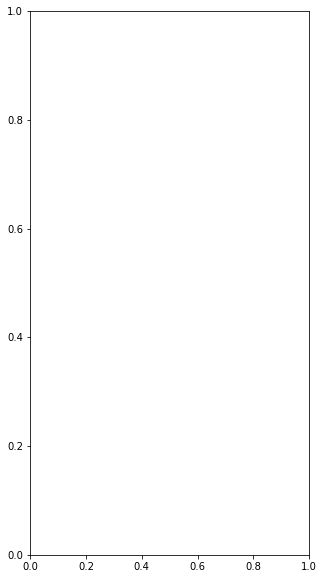

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5, 10))
ax = fig.add_subplot(1, 1, 1)
plt.show()

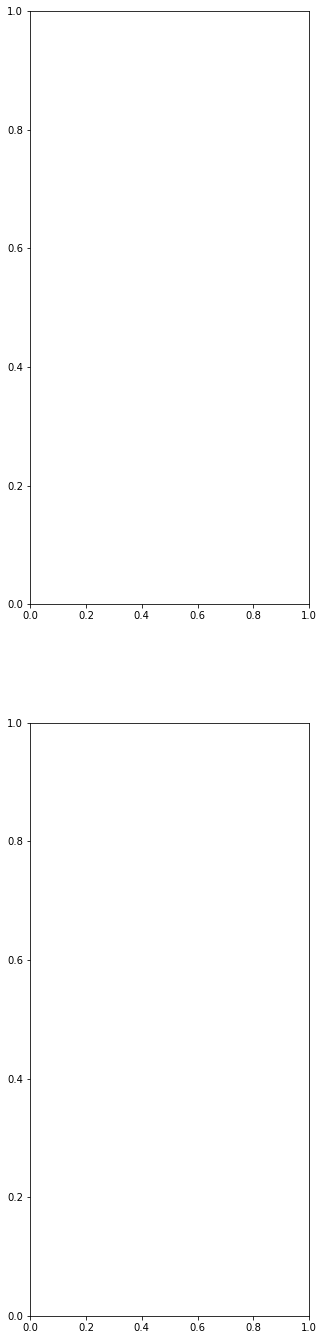

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5, 24))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
plt.show()

In [11]:
import numpy as np


a = np.linspace(1, 48)
print(a)
print(type(a))

[ 1.          1.95918367  2.91836735  3.87755102  4.83673469  5.79591837
  6.75510204  7.71428571  8.67346939  9.63265306 10.59183673 11.55102041
 12.51020408 13.46938776 14.42857143 15.3877551  16.34693878 17.30612245
 18.26530612 19.2244898  20.18367347 21.14285714 22.10204082 23.06122449
 24.02040816 24.97959184 25.93877551 26.89795918 27.85714286 28.81632653
 29.7755102  30.73469388 31.69387755 32.65306122 33.6122449  34.57142857
 35.53061224 36.48979592 37.44897959 38.40816327 39.36734694 40.32653061
 41.28571429 42.24489796 43.20408163 44.16326531 45.12244898 46.08163265
 47.04081633 48.        ]
<class 'numpy.ndarray'>
